In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_percentage_error

### Airline passengers

In [11]:
df = pd.read_csv('airline_passengers.csv', index_col = 'Month', parse_dates = True)
df.index.freq = 'MS'

<AxesSubplot:xlabel='Month'>

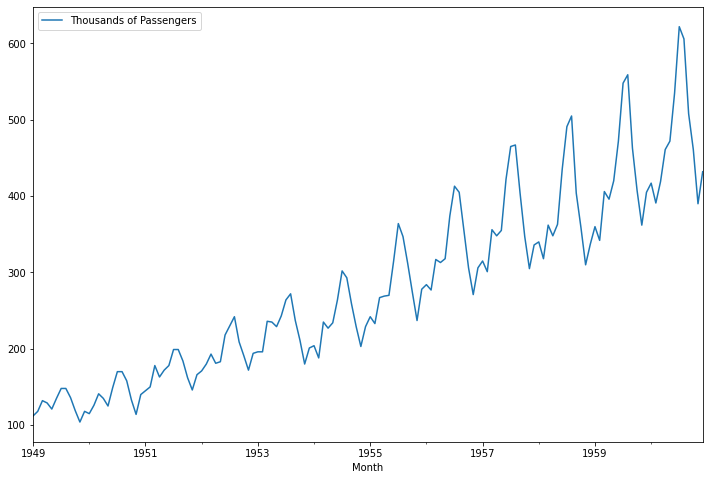

In [13]:
plt.rc("figure", figsize=(12,8))
df.plot()

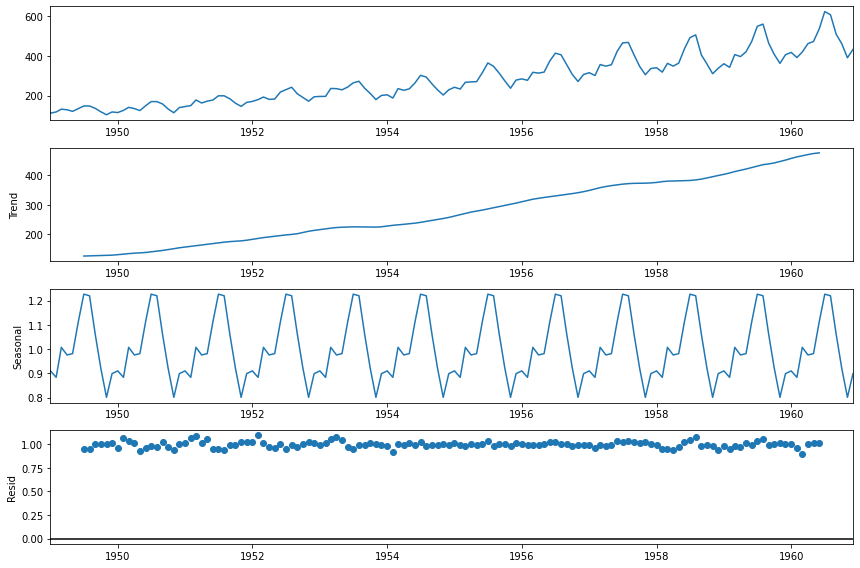

In [15]:
seasonalDecompose = seasonal_decompose(df, model = 'mul')
seasonalDecompose.plot();

In [16]:
auto_arima(df, seasonal = True, m = 12, trace = True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1020.048, Time=0.87 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.12 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1019.935, Time=0.50 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1019.290, Time=0.17 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=1019.546, Time=0.50 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1024.160, Time=0.08 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1017.847, Time=0.20 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1017.914, Time=0.44 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1018.359, Time=0.42 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=1018.248, Time=0.88 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.05 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=1022.393, Time=0.04 sec
 ARIMA(3,1,1)(0,1,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -504.923
Date:                             Tue, 12 Apr 2022   AIC                           1017.847
Time:                                     11:31:16   BIC                           1029.348
Sample:                                          0   HQIC                          1022.520
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5960      0.085      6.987      0.000       0.429       0.763
ar.L2          0.2143      0.091      2.343      0.019       0.035       0.394
ma.L1         -0.9819      0.038    -25.601      0.000      -1.057      -0.907
sigma2       129.3132     14.556      8.884      0.000     100.783     157.843
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.68
Prob(Q):                              0.98   Prob(JB):                         0.02
Heteroskedasticity (H):               2.33   Skew:                            -0.01
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
train = df.iloc[:-12]
test = df.iloc[-12:]

In [20]:
model = SARIMAX(train, order = (2, 1, 1), seasonal_order = (0, 1, 0, 12), enforce_stationarity = False, enforce_invertibility = False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                  132
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -439.866
Date:                             Tue, 12 Apr 2022   AIC                            887.733
Time:                                     11:37:20   BIC                            898.782
Sample:                                 01-01-1949   HQIC                           892.219
                                      - 12-01-1959                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2150      0.096    -12.620      0.000      -1.404      -1.026
ar.L2         -0.2985      0.083     -3.610      0.000      -0.461      -0.136
ma.L1          1.0000    283.237      0.004      0.997    -554.135     556.135
sigma2       104.5731   2.96e+04      0.004      0.997   -5.79e+04    5.81e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):                 0.30
Prob(Q):                              0.64   Prob(JB):                         0.86
Heteroskedasticity (H):               1.22   Skew:                            -0.05
Prob(H) (two-sided):                  0.54   Kurtosis:                         3.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
start = len(train)
end = start + len(test) - 1
predictions = results.predict(start = start, end = end, dynamic = False).rename('SARIMAX(2, 1, 1)(0, 1, 0, 12)')

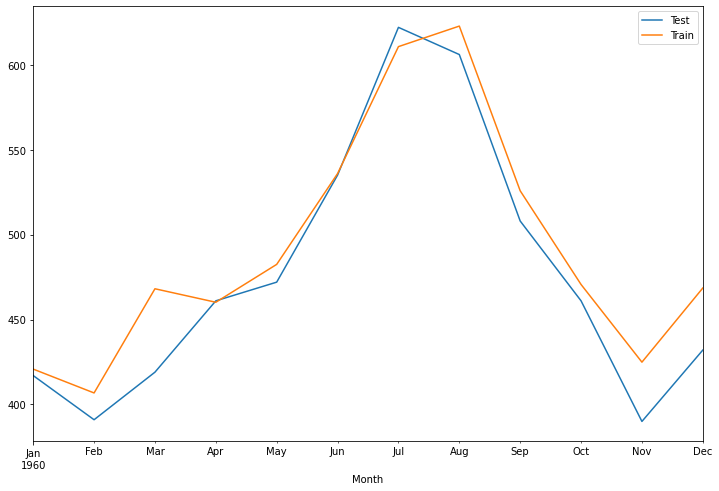

In [23]:
ax = test.plot()
predictions.plot(ax = ax)
plt.legend(['Test', 'Train', 'SARIMAX(2, 1, 1)(0, 1, 0, 12)'])

In [24]:
mean_absolute_percentage_error(test, predictions)

0.03901651579619179

# Ex. 2: Trends in Atmospheric Carbon Dioxide

### Import data

In [46]:
df = pd.read_csv('co2_mm_mlo.csv')
df['date'] = pd.to_datetime(dict(year = df['year'], month = df['month'], day = 1))

In [64]:
df = df.set_index(df['date'])
df.index.freq = 'MS'
df.head()

,year,month,decimal_date,average,interpolated,date
date,,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71,1958-03-01
1958-04-01,1958,4,1958.292,317.45,317.45,1958-04-01
1958-05-01,1958,5,1958.375,317.50,317.50,1958-05-01
1958-06-01,1958,6,1958.458,NaN,317.10,1958-06-01
1958-07-01,1958,7,1958.542,315.86,315.86,1958-07-01


<AxesSubplot:xlabel='date'>

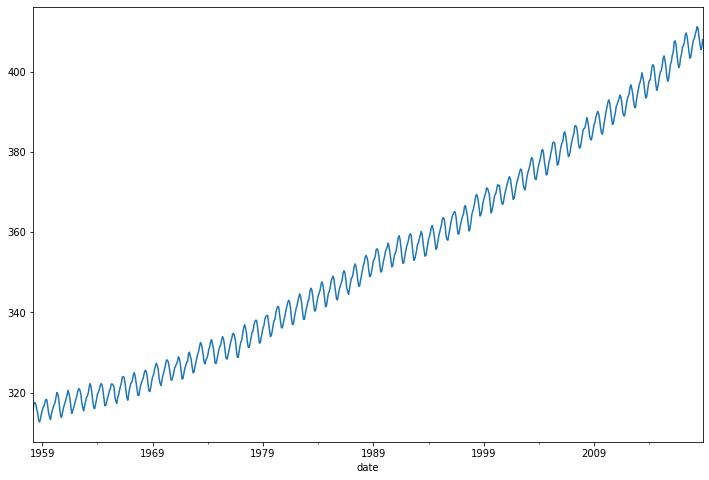

In [65]:
plt.rc("figure", figsize=(12,8))
df['interpolated'].plot()

### Check seasonality

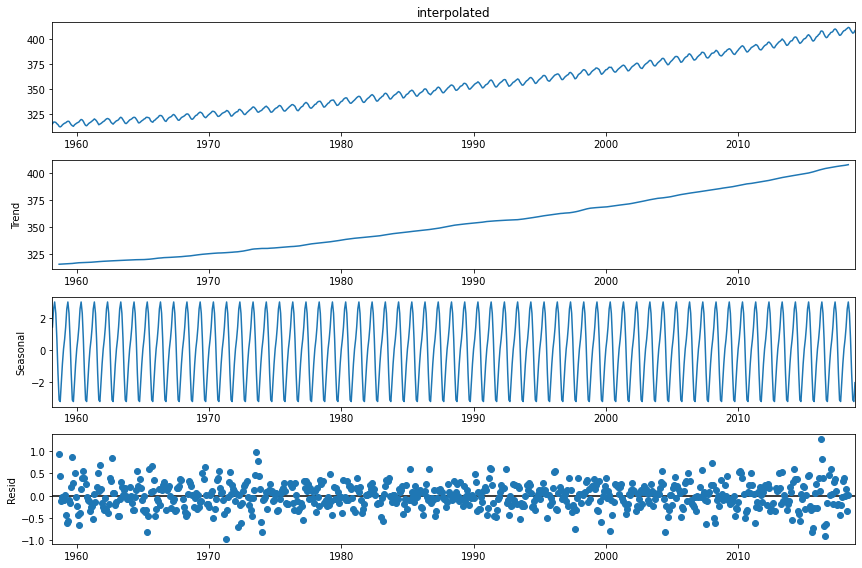

In [96]:
seasonalDecompose = seasonal_decompose(df['interpolated'], model = 'add')
seasonalDecompose.plot();

### Find the best SARIMA model

In [56]:
auto_arima(df['interpolated'], seasonal = True, m = 12, trace = True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=468.335, Time=2.13 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2369.532, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1614.808, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2375.248, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=1101.960, Time=1.91 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=770.631, Time=2.01 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=497.272, Time=6.29 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=538.245, Time=5.87 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=1440.918, Time=0.42 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=5.91 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=611.699, Time=5.79 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=8.81 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=463.577, Time=1.54 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : A

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -206.253
Date:                            Tue, 12 Apr 2022   AIC                            424.506
Time:                                    12:17:37   BIC                            452.047
Sample:                                         0   HQIC                           435.133
                                            - 729                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3482      0.058      6.042      0.000       0.235       0.461
ar.L2          0.0877      0.021      4.091      0.000       0.046       0.130
ma.L1         -0.7045      0.046    -15.157      0.000      -0.796      -0.613
ar.S.L12       0.9996      0.000   3009.602      0.000       0.999       1.000
ma.S.L12      -0.8661      0.021    -40.621      0.000      -0.908      -0.824
sigma2         0.0957      0.005     21.160      0.000       0.087       0.105
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 4.47
Prob(Q):                              0.81   Prob(JB):                         0.11
Heteroskedasticity (H):               1.13   Skew:                            -0.00
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Train the model

In [67]:
train = df.iloc[:-12]
test = df.iloc[-12:]

In [68]:
model = SARIMAX(train['interpolated'], order = (2, 1, 1), seasonal_order = (1, 0, 1, 12), enforce_stationarity = False, enforce_invertibility = False)
results = model.fit()
results.summary()

C:\Users\Rudy\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  717
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -172.734
Date:                            Tue, 12 Apr 2022   AIC                            357.468
Time:                                    12:21:17   BIC                            384.792
Sample:                                03-01-1958   HQIC                           368.029
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2547      0.128      1.992      0.046       0.004       0.505
ar.L2          0.0517      0.068      0.756      0.450      -0.082       0.186
ma.L1         -0.6287      0.126     -4.993      0.000      -0.875      -0.382
ar.S.L12       1.0036      0.001   1114.837      0.000       1.002       1.005
ma.S.L12      -1.1222      0.027    -41.728      0.000      -1.175      -1.069
sigma2         0.0739      0.005     14.837      0.000       0.064       0.084
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 6.11
Prob(Q):                              0.98   Prob(JB):                         0.05
Heteroskedasticity (H):               1.17   Skew:                            -0.04
Prob(H) (two-sided):                  0.22   Kurtosis:                         3.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Forecast on test data

In [69]:
start = len(train)
end = start + len(test) - 1
predictions = results.predict(start = start, end = end, dynamic = False).rename('SARIMAX(2, 1, 1)(1, 0, 1, 12)')

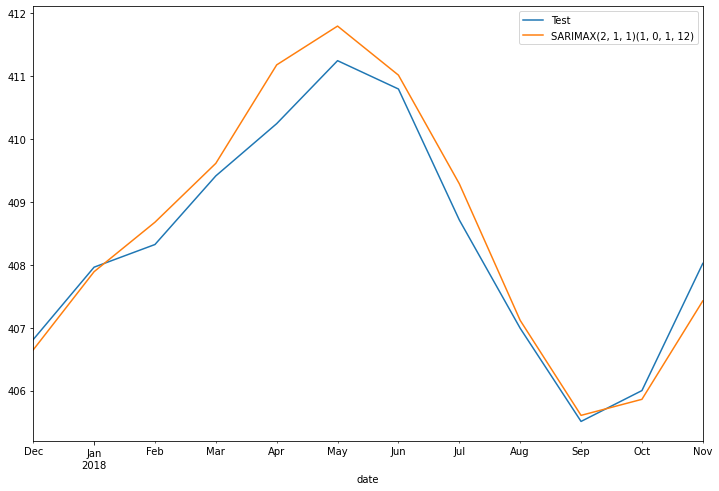

In [72]:
ax = test['interpolated'].plot()
predictions.plot(ax = ax)
plt.legend(['Test', 'SARIMAX(2, 1, 1)(1, 0, 1, 12)'])

In [74]:
mean_absolute_percentage_error(test['interpolated'], predictions)

0.0008194089691475436

### Holt-Winter's method

In [93]:
fitHoltWinter = ExponentialSmoothing(train['interpolated'], trend = 'mul', seasonal = 'add', seasonal_periods = 12).fit()
fcastHoltWinter = fitHoltWinter.forecast(len(test)).rename("Holt-Winter's predict")

C:\Users\Rudy\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [94]:
mean_absolute_percentage_error(test['interpolated'], fcastHoltWinter)

0.0005456164360626218

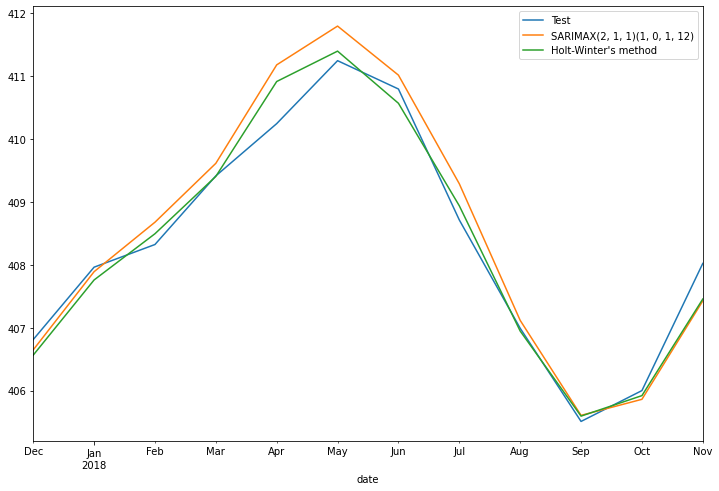

In [95]:
ax = test['interpolated'].plot()
predictions.plot(ax = ax)
fcastHoltWinter.plot(ax = ax)
plt.legend(['Test', 'SARIMAX(2, 1, 1)(1, 0, 1, 12)', "Holt-Winter's method"])

##### SARIMAX has bigger MAPE than Holt-Winter's method

### Final forecast

In [97]:
model = SARIMAX(df['interpolated'], order = (2, 1, 1), seasonal_order = (1, 0, 1, 12), enforce_stationarity = False, enforce_invertibility = False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  729
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -177.823
Date:                            Tue, 12 Apr 2022   AIC                            367.646
Time:                                    12:32:11   BIC                            395.071
Sample:                                03-01-1958   HQIC                           378.238
                                     - 11-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2595      0.130      1.999      0.046       0.005       0.514
ar.L2          0.0577      0.069      0.841      0.400      -0.077       0.192
ma.L1         -0.6326      0.128     -4.949      0.000      -0.883      -0.382
ar.S.L12       1.0034      0.001   1113.951      0.000       1.002       1.005
ma.S.L12      -1.1232      0.026    -43.202      0.000      -1.174      -1.072
sigma2         0.0743      0.005     15.266      0.000       0.065       0.084
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 5.94
Prob(Q):                              0.98   Prob(JB):                         0.05
Heteroskedasticity (H):               1.17   Skew:                            -0.06
Prob(H) (two-sided):                  0.22   Kurtosis:                         3.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [102]:
start = len(df) - 1
end = start + 12
predictions = results.predict(start = start, end = end, dynamic = False).rename('SARIMAX(2, 1, 1)(1, 0, 1, 12)')
predictions

2018-11-01    407.432756
2018-12-01    409.285287
2019-01-01    410.476142
2019-02-01    411.187804
2019-03-01    412.132612
2019-04-01    413.613458
2019-05-01    414.272541
2019-06-01    413.527971
2019-07-01    411.758880
2019-08-01    409.636435
2019-09-01    408.128743
2019-10-01    408.411478
2019-11-01    410.029608
Freq: MS, Name: SARIMAX(2, 1, 1)(1, 0, 1, 12), dtype: float64

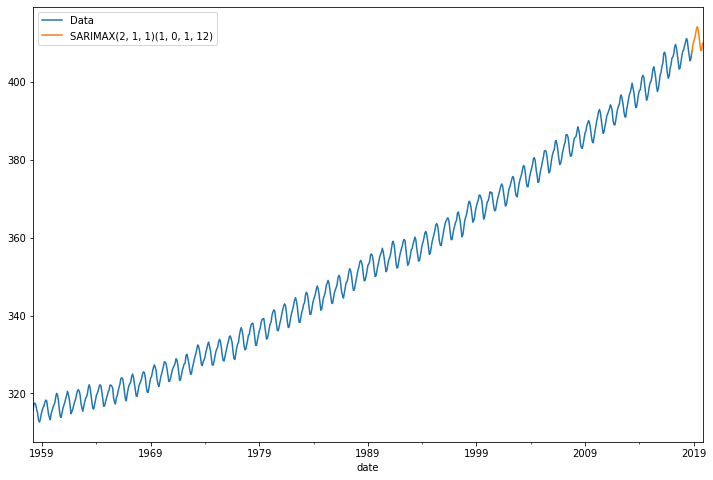

In [99]:
ax = df['interpolated'].plot()
predictions.plot(ax = ax)
plt.legend(['Data', 'SARIMAX(2, 1, 1)(1, 0, 1, 12)'])

### Importing real data

In [108]:
df2 = pd.read_csv('co2_mm_mlo_2.csv',comment='#',sep=',',index_col=False)
df2.index = pd.to_datetime(df2[['year','month']].apply(lambda x: f'{x[0]}-{x[1]}',axis=1))
df2

<ipython-input-108-81a4e262f77d>:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df2 = pd.read_csv('co2_mm_mlo_2.csv',comment='#',sep=',',index_col=False)


,year,month,decimal date,average,interpolated,trend,ndays
2018-11-01,2018,11,2018.8750,408.21,410.24,24,0.56
2018-12-01,2018,12,2018.9583,409.27,409.99,30,0.50
2019-01-01,2019,1,2019.0417,411.03,410.69,26,1.26
2019-02-01,2019,2,2019.1250,411.96,411.05,27,1.14
2019-03-01,2019,3,2019.2083,412.18,410.69,28,1.12
2019-04-01,2019,4,2019.2917,413.54,410.73,27,0.60
2019-05-01,2019,5,2019.3750,414.86,411.38,28,0.50
2019-06-01,2019,6,2019.4583,414.16,411.76,27,0.36
2019-07-01,2019,7,2019.5417,411.97,411.63,25,0.82
2019-08-01,2019,8,2019.6250,410.18,412.18,29,0.33


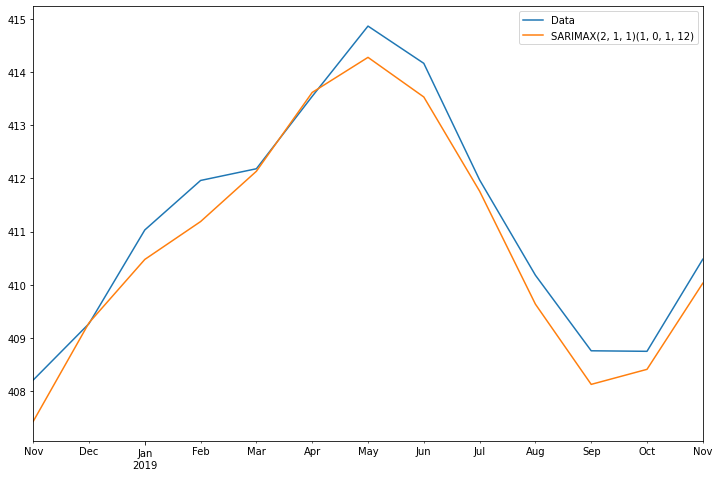

In [109]:
ax = df2['average'].plot()
predictions.plot(ax = ax)
plt.legend(['Data', 'SARIMAX(2, 1, 1)(1, 0, 1, 12)'])

In [110]:
mean_absolute_percentage_error(df2['average'], predictions)

0.0010542615361251405